<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment5/Differentiation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
#task 1
n = 1000;
dif_mat = np.zeros((n-1,n))
for i in range(n-1):
  for j in range(n):
    if (i ==j):
      dif_mat[i,j] = 1
    elif (j == i-1):
      dif_mat[i,j] = -1
print(dif_mat)

[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -1.  1.  0.]]


In [ ]:
dif_mat.shape

(999, 1000)

In [ ]:
x = np.linspace(0, 2*3.14,1000)                           # Put x_j = jh for some positive grid spacing h = 1000
y = np.sin(x)                                             # finding values of function at X
y1 = np.matmul(dif_mat,y)                                 # Finding Approximate Differentiation of function using Differentiation Matrix
y1 = y1/(2*3.14/1000)



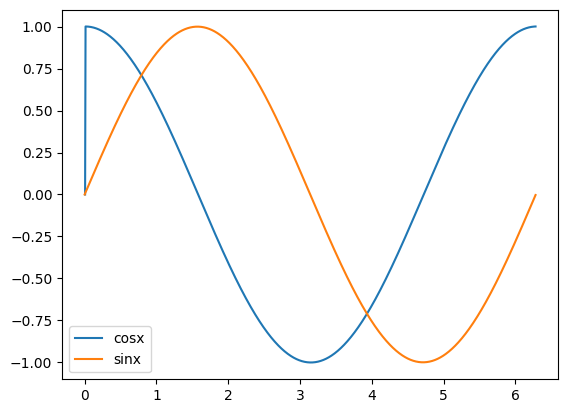

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[1:],y1,label ='cosx')
plt.plot(x,y,label = 'sinx')
plt.legend(loc='best')

In [ ]:
#task 2
import numpy as np
x = np.linspace(0, 2*3.14,1000)
y = x**2 + 2*(np.sin(10*x))
y1 = np.matmul(dif_mat,y)
y1 = y1/(2*3.14/1000)

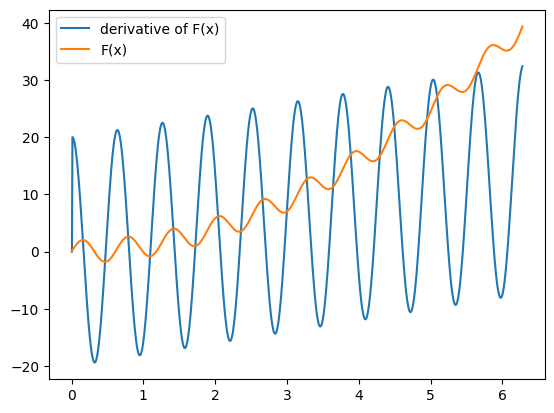

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[1:],y1,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')

In [ ]:
from numpy import diag

def get_diff_mat(n):
  diff1 = np.diag(np.ones((n-2)),-1)
  diff2 = np.diag(np.ones((n-1)))
  diff_mat_eff = diff2 - diff1
  return diff_mat_eff

In [ ]:
diff_mat_eff = get_diff_mat(n)


x_new = x[:-1]
y_new = x_new**2 + 2*(np.sin(10*x_new))
y_new.shape

(999,)

In [ ]:
y_new = x_new**2 + 2*(np.sin(10*x_new))
y1_new = np.matmul(diff_mat_eff,y_new)
y1_new = y1_new/(2*3.14/1000)

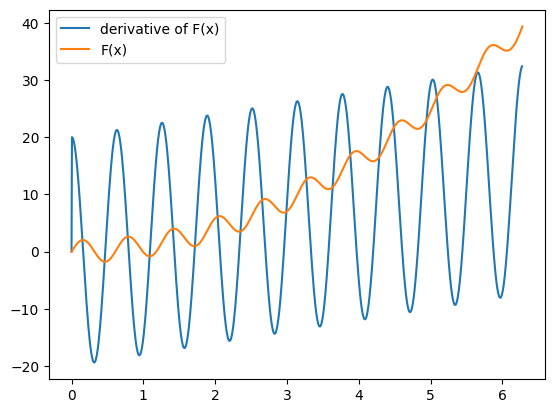

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x_new,y1_new,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')

In [ ]:
                            #averaging opeartor
def get_diag_mat(n,k):
  y = np.diag(np.eyes(n))
  for i in range(1,k):
    y = y+ np.diag(np.eyes(n-i),i) +np.diag(np.eyes(n-i),-i)
  return y

In [ ]:
def get_avg_mat(y):
  avg = np.sum(y,1)
  for i in range(len(avg)):
    y[i,:] = y[i,:]/avg[i]
  return y

In [ ]:
def plot_fornk(n,k,y,diff_mat_eff):
  A = get_diag_mat(n,k)
  A = get_avg_mat(A)
  y_1 = np.matmul(A,y)
  plt.plot(x,y_1,label="Applying averaging matrix to F(x)")
  y_1 = np.matmul(diff_mat_eff,y_1[:-1])
  y_1 = y_1/(2*3.14/1000)
  plt.plot(x_new,y_1,label ='Derivative after applying averaging matrix to F(x)')
  plt.plot(x,y,label = 'F(x)')
  plt.legend(loc='best')

In [ ]:
y_1 = np.matmul(A,y)
y_1 = np.matmul(diff_mat_eff,y_1[:-1])
y_1 = y_1/(2*3.14/1000)

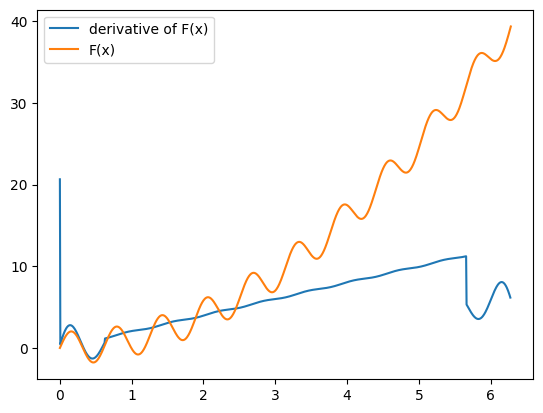

In [ ]:
plt.plot(x_new,y_1,label ='derivative of F(x)')
plt.plot(x,y,label = 'F(x)')
plt.legend(loc='best')

In [ ]:
def add_avg_mat(n,k,y,diff_mat_eff):
  A = get_diag_mat(n,k)
  A = get_avg_mat(A)
  y_1 = np.matmul(A,y)
  y_2 = np.matmul(diff_mat_eff,y[:-1])
  y_2 = y_2/(2*3.14/1000)
  y_1 = y_1[:-1]+y_2
  plt.plot(x_new,y_2,label ='Derivative of F(x)')
  plt.plot(x,y,label = 'F(x)')
  plt.plot(x_new,y_1,label="Adding averaging matrix to derivative")
  add_avg_mat(n,100,y,diff_mat_eff)
  plt.legend('best')